In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from zipfile import ZipFile
import zipfile
import cv2
import os
import numpy as np
from PIL import Image

In [2]:
%matplotlib inline

import numpy as np
from pprint import pprint

from PIL import Image
import matplotlib.pyplot as plt

import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import torchvision.transforms.functional as F
import torchvision
from torchvision import models, datasets, transforms
import torch.nn.functional as func
#torch.manual_seed(50)


print(torch.__version__, torchvision.__version__)

#print (torch.cuda.get_device_name(device='cuda:0'))

2.0.0+cu118 0.15.1+cu118


In [3]:
data_dir = 'skin11\melanoma_cancer_dataset'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/test")
print(classes)

['test', 'train']
['benign', 'malignant']


In [4]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

Checking **mean** and **SD**

In [5]:
# import torchvision
# from torchvision import transforms
# from torch.utils.data import DataLoader

# data_path = 'skin1\melanoma_cancer_dataset'

# transform_img = transforms.Compose([
#     #transforms.Resize((32,32)),
#     #transforms.CenterCrop(32),
#     transforms.ToTensor(),
# ])

# image_data = torchvision.datasets.ImageFolder(
#   root=data_path, transform=transform_img
# )

# image_data_loader = DataLoader(
#   image_data, 
#   batch_size=len(image_data), 
#   shuffle=False, 
#   num_workers=0
# )
# from torch.utils.data import DataLoader


# def mean_std(loader):
#   images, lebels = next(iter(loader))
#   # shape of images = [b,c,w,h]
#   mean, std = images.mean([0,2,3]), images.std([0,2,3])
#   return mean, std

# mean, std = mean_std(image_data_loader)
# print("mean and std: \n", mean, std)

In [6]:
from sklearn.utils import shuffle
import torchvision.transforms as transforms

tp = transforms.Compose([
    #transforms.Resize(32),
    #transforms.CenterCrop(32),
    transforms.Resize((32,32)),
    
    transforms.ToTensor()
    #transforms.Normalize((0.7160, 0.5668, 0.5441), (0.2207, 0.2087, 0.2222)),
    #transforms.Grayscale(num_output_channels=1)
])
tt = transforms.ToPILImage()

dataset = ImageFolder(data_dir+'/test', transform=tp)
#dataset1 = DataLoader(trainset, shuffle=True, batch_size=batch_size, num_workers=0)



In [7]:
type(dataset)

torchvision.datasets.folder.ImageFolder

In [8]:
img, label = dataset[0]
print(img.shape, label)

torch.Size([3, 32, 32]) 0


In [9]:
type(img)

torch.Tensor

In [10]:
img_na = img.numpy()
print(type(img))
print(type(img_na))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


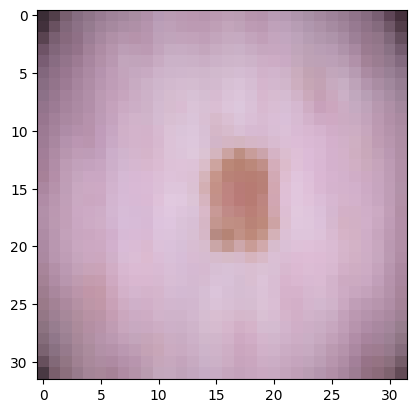

In [11]:
plt.imshow(img.permute(1, 2, 0)) 


In [12]:
#from PIL import Image
#img_data=[]
#images=os.listdir('/content/sample_data/Covid')
#for img in images:
#  image_arr= cv2.imread(os.path.join('/content/sample_data/Covid',img))
#  
#  img_data.append(image_arr)

In [13]:
dataset

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: skin11\melanoma_cancer_dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [14]:
image_data=[]
target=[]
for i, j in dataset:
  image_data.append(i)
  target.append(j)

In [15]:
image_data1=torch.stack(image_data)
image_data2=image_data1.numpy()
image_data2.shape

(1000, 3, 32, 32)

In [16]:
qq=np.rollaxis(image_data2,1,4)
qq.shape

(1000, 32, 32, 3)

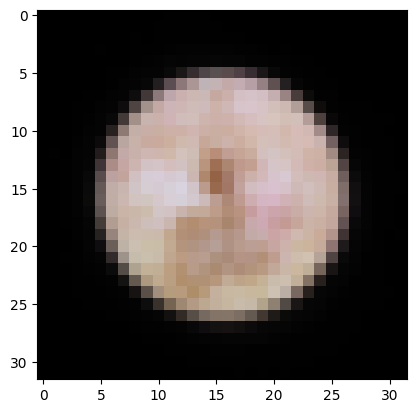

In [17]:
plt.imshow(qq[555])

In [18]:
# dst = datasets.CIFAR100("~/.torch", download=True)
# dst = datasets.MNIST("~/.torch", download=True)

# tp = transforms.Compose([
#     #transforms.Resize(32),
#     #transforms.CenterCrop(32),
#     transforms.Resize((32,32)),
#     transforms.ToTensor(), transforms.Grayscale(num_output_channels=1)
# ])
# tt = transforms.ToPILImage()

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
print("Running on %s" % device)

def label_to_onehot(target, num_classes=2):
    target = torch.unsqueeze(target, 1)
    onehot_target = torch.zeros(target.size(0), num_classes, device=target.device)
    onehot_target.scatter_(1, target, 1)
    return onehot_target

def cross_entropy_for_onehot(pred, target):
    return torch.mean(torch.sum(- target * F.log_softmax(pred, dim=-1), 1))

Running on cuda


In [19]:
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.5, 0.5)
#         nn.init.xavier_uniform_(m.weight.data)
#     if hasattr(m, "bias"):
#         #m.bias.data.uniform_(-0.5, 0.5)
#         #nn.init.xavier_uniform(m.bias.data)
#         m.bias.data.fill_(0)



# class LeNet(nn.Module):

#     def __init__(self):

#         super(LeNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, kernel_size=5,stride=2)
#         self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=2)
#         self.fc1 = nn.Linear(16*5*5, 256)
#         self.fc2 = nn.Linear(256, 120)
#         self.fc3 = nn.Linear(120, 106)

#     def forward(self, x):
#         #x = func.relu(self.conv1(x))
#         x = func.sigmoid(self.conv1(x))
#         #x = func.max_pool2d(x, 2)
#         #x = func.relu(self.conv2(x))
#         x = func.sigmoid(self.conv2(x))
#         #x = func.max_pool2d(x, 2)
#         x = x.view(x.size(0), -1)
#         #x = func.relu(self.fc1(x))
#         x = func.sigmoid(self.fc1(x))
#         #x = func.relu(self.fc2(x))
#         x = func.sigmoid(self.fc2(x))
#         x = self.fc3(x)
#         return x

    
    
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.3, 0.3)
#     if hasattr(m, "bias"):
#         m.bias.data.uniform_(-0.3, 0.3)

torch.manual_seed(50)

def weights_init(m):
    if hasattr(m, "weight"):
        m.weight.data.uniform_(-0.5, 0.5)
    if hasattr(m, "bias"):
        m.bias.data.uniform_(-0.5, 0.5)
        
def weights_init_dropout(m):
    if hasattr(m, "weight"):
        m.weight.data.uniform_(-0.1, 0.1)
    if hasattr(m, "bias"):
        m.bias.data.uniform_(-0.1, 0.1)

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        act = nn.Sigmoid
        #act = nn.Tanh
        #act = nn.ReLU
        #act = nn.Softmax
        self.body = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
           
        )
        self.fc = nn.Sequential(
                nn.Linear(40000, 2)
                # nn.Dropout(p=0.0)
        )
        
    def forward(self, x):
        out = self.body(x)
        out = out.view(out.size(0), -1)
        # print(out.size())
        out = self.fc(out)
        return out

    

net = LeNet().to(device)
net.apply(weights_init)


# class LeNet_att(nn.Module):
#     def __init__(self):
#         super(LeNet_att, self).__init__()
#         act = nn.Sigmoid
#         #act = nn.Tanh
#         #act = nn.ReLU
#         self.body = nn.Sequential(
#             nn.Conv2d(3, 12, kernel_size=5, padding=5//2, stride=2),
#             act(),
#             nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=2),
#             act(),
#             nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
#             act(),
#             nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
#             act(),
#         )
#         self.fc = nn.Sequential(
#                 nn.Linear(768, 106)
#         )
        
#     def forward(self, x):
#         out = self.body(x)
#         out = out.view(out.size(0), -1)
#         # print(out.size())
#         out = self.fc(out)
#         return out

# net_att = LeNet_att().to(device)
# net_att.apply(weights_init_dropout)
    
#criterion = cross_entropy_for_onehot
criterion = nn.CrossEntropyLoss()
print(net)
# for name, param in net.named_parameters():
#     print(name, param.size(), param.requires_grad)

LeNet(
  (body): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (3): Sigmoid()
    (4): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (5): Sigmoid()
    (6): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (7): Sigmoid()
    (8): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (9): Sigmoid()
    (10): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (11): Sigmoid()
  )
  (fc): Sequential(
    (0): Linear(in_features=40000, out_features=2, bias=True)
  )
)


In [20]:
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data

#from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
#lfw_people=fetch_lfw_people(min_faces_per_person=10,color=True,slice_=(slice(61,189),slice(61,189)),resize=0.25)

#x=lfw_people.images
#y=lfw_people.target
x=qq
y=target

#target_names=lfw_people.target_names
#n_classes=target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.00001,shuffle=False)


# #two people
# X_train_two = []
# y_train_two = []
# X_test_two = []
# y_test_two = []
# for ct_d in range(X_train.shape[0]):
#     if  y_train[ct_d] == 6:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(1)
        
# for ct_d in range(X_test.shape[0]):
#     if  y_train[ct_d] == 6:        
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(1)
        
# X_train = np.asarray(X_train_two)    
# X_test = np.asarray(X_test_two)  
# y_train = np.asarray(y_train_two)  
# y_test = np.asarray(y_test_two)  

print (X_train.shape)
print (X_test.shape)

         
#X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
#X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
#X_train = torch.transpose
#X_train = X_train.astype('float32')
#X_train /= 255.0
#X_test /= 255.0

 


x_train = torch.Tensor(X_train).to(device)
x_train = x_train.transpose(2,3).transpose(1,2)
y_train = torch.LongTensor(y_train).to(device)

x_test = torch.FloatTensor(X_test).to(device)
x_test = x_test.transpose(2,3).transpose(1,2)
y_test = torch.LongTensor(y_test).to(device)


training = data.TensorDataset(x_train,y_train)

testing = data.TensorDataset(x_test,y_test)

dst_tensor=training

criterion_train = nn.CrossEntropyLoss()
optimizer_train = optim.Adam(net.parameters(),lr=0.01)#,momentum=0.9)
trainloader = torch.utils.data.DataLoader(training,batch_size=32, shuffle=False)

(999, 32, 32, 3)
(1, 32, 32, 3)


In [21]:
iter_ = 0


for epoch in range(1):

    for i,data in enumerate(trainloader):
   
        #if epoch>=1:
        if i==1:
            #break
            iter_=iter_+1
            #print (iter_)
            inputs,label = data
            #print(input.size())    #printed previously for me.

            inputs,label =  Variable(inputs),Variable(label) 

            optimizer_train.zero_grad()


            outputs_benign=net(inputs)
            
            #outputs_benign = F.softmax(outputs_benign, dim=-1)
            #print (outputs_benign[0])


            loss_benign =  criterion_train(outputs_benign,label)

            #print("loss computed")
            loss_benign.backward()
            #print("loss BP")
            optimizer_train.step()

            #if i%2000==0:
            print (loss_benign.item())
            #torch.save(net.state_dict(),'./LFW_net.pth')  
       
  
print ('fininshed training')
total = len(y_test)
acc =0.0
for ct in range(total):
    testing_data = tt(testing[ct][0].cpu())
    testing_data1 = tp(testing_data).to(device)
    testing_data2 = testing_data1.view(1, *testing_data1.size())
    #print(testing_data2.size())
    y_pred = net(testing_data2)
    predicted = torch.argmax(y_pred)
    #print(predicted, y_test[ct])
    if predicted == y_test[ct]:
        acc=acc+1
        #print(acc)
accuracy = acc / total
print (accuracy)
print ('fininshed testing')

24.764698028564453
fininshed training
0.0
fininshed testing


In [22]:
#original_dy_dx

In [23]:
pip install pytorch-msssim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [24]:
import torch.nn.functional as F

In [25]:
# dst_tensor_new=training+testing
# len(dst_tensor_new)
len(dst_tensor)

999

Image ID and Image count:  0 1
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
tensor([[0]], device='cuda:0')
torch.Size([1, 2])
Dummy label is 0.
stolen label is 0.


C:\Users\badha\AppData\Local\Temp\ipykernel_4280\3507445798.py:287: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 6, i + 1)


Running time is : 3.046875
Duration =  3.046875
ssim_random2 [0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987 0.00672987
 

Running time is : 2.984375
Duration =  2.984375
ssim_random2 [0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039 0.00325039
 

Running time is : 3.0625
Duration =  3.0625
ssim_random2 [0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336 0.00230336
 0.00

Running time is : 3.46875
Duration =  3.46875
ssim_random2 [0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556 0.00243556
 0.

Running time is : 3.359375
Duration =  3.359375
ssim_random2 [0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295 0.00301295
 

Running time is : 3.015625
Duration =  3.015625
ssim_random2 [-0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035
 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0.00660035 -0

Running time is : 3.21875
Duration =  3.21875
ssim_random2 [-0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255
 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.00177255 -0.0

Running time is : 3.203125
Duration =  3.203125
ssim_random2 [-0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288
 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0.00212288 -0

Running time is : 3.0625
Duration =  3.0625
ssim_random2 [-0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931
 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.01124931 -0.011

Running time is : 3.03125
Duration =  3.03125
ssim_random2 [0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789 0.00648789
 0.

Running time is : 2.9375
Duration =  2.9375
ssim_random2 [0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802 0.0012802
 0.0012802 0.0012802

Running time is : 2.90625
Duration =  2.90625
ssim_random2 [-6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06 -6.07416359e-06
 -6.07416359e-06 -6.07416359e-0

Running time is : 3.15625
Duration =  3.15625
ssim_random2 [0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528 0.01228528
 0.

Running time is : 3.21875
Duration =  3.21875
ssim_random2 [0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612 0.00311612
 0.

Running time is : 3.28125
Duration =  3.28125
ssim_random2 [-0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654
 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.00125654 -0.0

Running time is : 3.453125
Duration =  3.453125
ssim_random2 [-0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531
 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0.00281531 -0

Running time is : 3.203125
Duration =  3.203125
ssim_random2 [0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528 0.00322528
 

Running time is : 3.109375
Duration =  3.109375
ssim_random2 [-0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836
 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0.00152836 -0

Running time is : 2.984375
Duration =  2.984375
ssim_random2 [0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073 0.00179073
 

Running time is : 3.03125
Duration =  3.03125
ssim_random2 [0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008 0.00315008
 0.

Running time is : 3.09375
Duration =  3.09375
ssim_random2 [-0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237
 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.00277237 -0.0

Running time is : 3.046875
Duration =  3.046875
ssim_random2 [-0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617 -0.0169617
 

Running time is : 3.15625
Duration =  3.15625
ssim_random2 [-0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367
 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.00597367 -0.0

Running time is : 3.3125
Duration =  3.3125
ssim_random2 [0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756 0.00057756
 0.00

Running time is : 3.34375
Duration =  3.34375
ssim_random2 [-0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088 -0.0006088
 -0

Running time is : 3.140625
Duration =  3.140625
ssim_random2 [-0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546 -0.0011546
 

Running time is : 22.34375
Duration =  22.34375
ssim_random2 [0.00203136 0.0436807  0.13374463 0.25558144 0.42521259 0.61968821
 0.74930656 0.84328878 0.91834676 0.9668979  0.98851866 0.99522054
 0.99749267 0.99789327 0.99795723 0.9982003  0.99822491 0.99826193
 0.99832666 0.99839342 0.9984684  0.99851722 0.99855053 0.99859703
 0.99863219 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622 0.99870622
 

Running time is : 17.5
Duration =  17.5
ssim_random2 [-0.00172608  0.09487039  0.24497756  0.43899983  0.67302644  0.85316455
  0.92992872  0.96307695  0.98502797  0.99420518  0.99773973  0.99897403
  0.99923438  0.99937546  0.99945235  0.99954909  0.99960148  0.99960935
  0.99961758  0.99965572  0.99966848  0.99968016  0.99968904  0.99969792
  0.99970764  0.99972582  0.99973482  0.99974573  0.99975574  0.99975574
  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574
  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574
  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574
  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574
  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574
  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574
  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574
  0.99975574  0.99975574  0.99975574  0.99975574  0.99975574  0.9997557

Running time is : 17.515625
Duration =  17.515625
ssim_random2 [-0.00271553  0.07053075  0.19213454  0.37772655  0.60522115  0.78807467
  0.88579667  0.9272356   0.96364611  0.98001903  0.99003637  0.99499965
  0.99759263  0.99883783  0.99931473  0.99938118  0.99941081  0.99942112
  0.99946296  0.99950069  0.99950922  0.99953103  0.99953312  0.9995622
  0.9995622   0.9995622   0.9995622   0.9995622   0.9995622   0.9995622
  0.9995622   0.9995622   0.9995622   0.9995622   0.9995622   0.9995622
  0.9995622   0.9995622   0.9995622   0.9995622   0.9995622   0.9995622
  0.9995622   0.9995622   0.9995622   0.9995622   0.9995622   0.9995622
  0.9995622   0.9995622   0.9995622   0.9995622   0.9995622   0.9995622
  0.9995622   0.9995622   0.9995622   0.9995622   0.9995622   0.9995622
  0.9995622   0.9995622   0.9995622   0.9995622   0.9995622   0.9995622
  0.9995622   0.9995622   0.9995622   0.9995622   0.9995622   0.9995622
  0.9995622   0.9995622   0.9995622   0.9995622   0.9995622   0.999562

Running time is : 17.421875
Duration =  17.421875
ssim_random2 [-0.00484881  0.23397534  0.47903833  0.68261278  0.83528394  0.9226197
  0.96497887  0.98050737  0.99213028  0.99726504  0.99917686  0.99969786
  0.999753    0.9997468   0.99979639  0.99980962  0.99980819  0.99985993
  0.99985313  0.99986142  0.99986207  0.99989027  0.99989384  0.99989337
  0.99989748  0.99990243  0.99989837  0.99991262  0.999915    0.999915
  0.999915    0.999915    0.999915    0.999915    0.999915    0.999915
  0.999915    0.999915    0.999915    0.999915    0.999915    0.999915
  0.99992585  0.9999212   0.9999212   0.9999212   0.9999212   0.9999212
  0.9999212   0.9999212   0.9999212   0.9999212   0.9999212   0.9999212
  0.9999212   0.9999212   0.9999212   0.9999212   0.9999212   0.9999212
  0.9999212   0.9999212   0.9999212   0.9999212   0.9999212   0.9999212
  0.9999212   0.9999212   0.9999212   0.9999212   0.9999212   0.9999212
  0.9999212   0.9999212   0.9999212   0.9999212   0.9999212   0.9999212
 

Running time is : 18.46875
Duration =  18.46875
ssim_random2 [0.00256705 0.09233605 0.20027208 0.35018528 0.51405323 0.679923
 0.77522326 0.84573925 0.90416759 0.9519757  0.97807235 0.98886937
 0.99043316 0.99442852 0.99728537 0.99782109 0.99812484 0.99825501
 0.99828142 0.99833429 0.99841684 0.9985075  0.99854839 0.99862546
 0.99869269 0.99869883 0.99877787 0.99881381 0.99886268 0.99886268
 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268
 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268
 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268
 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268
 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268
 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268
 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268
 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268
 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268 0.99886268
 0.

Running time is : 19.703125
Duration =  19.703125
ssim_random2 [0.0014928  0.09318475 0.25842237 0.46531457 0.6783967  0.84892178
 0.92950845 0.9642266  0.98319173 0.99342942 0.99717617 0.99856365
 0.99926472 0.9996478  0.99974173 0.99975461 0.99976367 0.99977589
 0.99978268 0.99979115 0.9998014  0.99980897 0.99981749 0.99982548
 0.99983358 0.99983996 0.9998461  0.99985158 0.99985158 0.99985158
 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158
 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158
 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158
 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158
 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158
 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158
 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158
 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158
 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158 0.99985158

Running time is : 23.453125
Duration =  23.453125
ssim_random2 [-0.0070966   0.16837722  0.32972565  0.4903934   0.6660096   0.79669178
  0.87926692  0.92976844  0.96436137  0.98480052  0.99337995  0.99677122
  0.99848908  0.99926949  0.99959773  0.99960816  0.99964392  0.99965996
  0.99967051  0.99968737  0.99970484  0.9997052   0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998 

Running time is : 23.3125
Duration =  23.3125
ssim_random2 [-0.00502679  0.21026748  0.380218    0.54001999  0.71015728  0.82449818
  0.89461184  0.9386586   0.96960586  0.98618793  0.99393153  0.9960534
  0.99782175  0.99887109  0.99921119  0.999277    0.99931252  0.9993397
  0.99935293  0.99937987  0.99941224  0.99942374  0.99943876  0.99945444
  0.99947518  0.99949998  0.99952269  0.99952269  0.99952269  0.99952269
  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269
  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269
  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269
  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269
  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269
  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269
  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269
  0.99952269  0.99952269  0.99952269  0.99952269  0.99952269  0.999

Running time is : 23.59375
Duration =  23.59375
ssim_random2 [0.00594095 0.12907642 0.31382224 0.50450552 0.70670599 0.85273027
 0.9155606  0.95534152 0.97713804 0.99015558 0.99571466 0.99782801
 0.99802846 0.99899757 0.99954379 0.99967575 0.99973917 0.99975061
 0.99975652 0.99977827 0.99980116 0.9998073  0.99981451 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904 0.99981904
 

Running time is : 24.40625
Duration =  24.40625
ssim_random2 [0.01270401 0.12118742 0.24533767 0.38536078 0.54277104 0.69137186
 0.79913414 0.87661791 0.93642491 0.97435844 0.99031734 0.99461341
 0.99713051 0.9979248  0.99794519 0.99816626 0.99823844 0.99849594
 0.99855894 0.9986186  0.99862516 0.99869764 0.99875468 0.99880594
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996 0.99882996
 

Running time is : 23.5625
Duration =  23.5625
ssim_random2 [-0.00250957  0.15651262  0.35035986  0.6075145   0.79935014  0.89992106
  0.94756198  0.97629106  0.98854661  0.99544144  0.99832428  0.9992075
  0.9996087   0.99975729  0.99976528  0.99980199  0.99982393  0.99984998
  0.99986517  0.99987048  0.99987507  0.99988025  0.99988621  0.99989128
  0.99989617  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867
  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867
  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867
  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867
  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867
  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867
  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867
  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867
  0.99989867  0.99989867  0.99989867  0.99989867  0.99989867  0.99

Running time is : 17.578125
Duration =  17.578125
ssim_random2 [6.54721342e-04 2.74072647e-01 4.94545937e-01 7.05434084e-01
 8.57381344e-01 9.49420571e-01 9.78120983e-01 9.90723491e-01
 9.96535957e-01 9.98951614e-01 9.99671638e-01 9.99874294e-01
 9.99947786e-01 9.99953747e-01 9.99959588e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.99961019e-01 9.99961019e-01 9.99961019e-01
 9.99961019e-01 9.9996

Running time is : 18.078125
Duration =  18.078125
ssim_random2 [-0.00706484  0.09268348  0.20908438  0.35119861  0.53301144  0.68255681
  0.77749896  0.85438383  0.92277956  0.96765035  0.98742437  0.99501705
  0.99795544  0.99900234  0.99923468  0.99926013  0.99928468  0.99931753
  0.99937868  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287
  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287
  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287
  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287
  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287
  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287
  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287
  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287
  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287
  0.99939287  0.99939287  0.99939287  0.99939287  0.99939287 

Running time is : 17.34375
Duration =  17.34375
ssim_random2 [-0.0029381   0.1654184   0.32076403  0.4342491   0.58621371  0.74529922
  0.851026    0.91426486  0.95963049  0.98059309  0.99143666  0.99589181
  0.99778241  0.99899709  0.99926007  0.99933624  0.99934095  0.99937785
  0.99937648  0.99942005  0.99945319  0.99946612  0.99948663  0.99948663
  0.99948663  0.99948663  0.99948663  0.99948663  0.99948663  0.99948663
  0.99948663  0.99948812  0.99951953  0.99951953  0.99951953  0.99951953
  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953
  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953
  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953
  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953
  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953
  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953
  0.99951953  0.99951953  0.99951953  0.99951953  0.99951953  0

Running time is : 20.5625
Duration =  20.5625
ssim_random2 [-0.00653341  0.44605753  0.65935338  0.8343811   0.92445058  0.96722174
  0.98344767  0.99204081  0.9967922   0.99858987  0.99949044  0.99978018
  0.99989623  0.99995232  0.99995488  0.99995601  0.99995673  0.99996543
  0.99996632  0.99996746  0.99996966  0.99997038  0.99997163  0.99997276
  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276
  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276
  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276
  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276
  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276
  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276
  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276
  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276
  0.99997276  0.99997276  0.99997276  0.99997276  0.99997276  0.9

Running time is : 23.4375
Duration =  23.4375
ssim_random2 [0.0060048  0.17089091 0.3947171  0.63896298 0.82676852 0.92223358
 0.95952451 0.97633696 0.98767775 0.99444479 0.99768198 0.99883091
 0.99946725 0.99976766 0.99988616 0.99989122 0.99989164 0.99990195
 0.99990797 0.99991357 0.99991691 0.99992079 0.99992341 0.99992579
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038 0.99993038
 0.

Running time is : 22.8125
Duration =  22.8125
ssim_random2 [0.01445983 0.53995323 0.71153468 0.84640694 0.92555153 0.9670862
 0.98451364 0.99409908 0.99606103 0.99749494 0.99909699 0.99960911
 0.99972171 0.99986529 0.99994081 0.99994588 0.99995291 0.99995577
 0.99995869 0.99996138 0.99996293 0.99996459 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561 0.99996561
 0.9

Running time is : 23.484375
Duration =  23.484375
ssim_random2 [0.00436832 0.03171839 0.11413272 0.24651679 0.45031971 0.66467261
 0.79443359 0.87160534 0.93007725 0.96987772 0.98814774 0.9945029
 0.99732387 0.99870205 0.99922794 0.99926269 0.99937761 0.99940223
 0.99942636 0.9994458  0.99947441 0.99950022 0.99951422 0.99952841
 0.99954581 0.99956357 0.99959368 0.99960673 0.99960673 0.99960673
 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673
 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673
 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673
 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673
 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673
 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673
 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673
 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673
 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673 0.99960673


Running time is : 22.109375
Duration =  22.109375
ssim_random2 [0.00571722 0.25291121 0.49033403 0.72006989 0.8599683  0.94271553
 0.97477007 0.98601294 0.99358737 0.99742907 0.99914861 0.99971908
 0.99986482 0.99988574 0.99988544 0.99989033 0.99990427 0.99991626
 0.99992007 0.99992007 0.99992198 0.99992442 0.99992657 0.99993134
 0.9999342  0.99993676 0.99993932 0.99993932 0.99993932 0.99993932
 0.99993932 0.99993932 0.99993932 0.99993932 0.99993932 0.99993932
 0.99993932 0.99993932 0.99993932 0.99993932 0.99993932 0.99993932
 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135
 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135
 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135
 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135
 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135
 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135
 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135 0.99994135

Running time is : 22.96875
Duration =  22.96875
ssim_random2 [0.00360011 0.12702985 0.26985395 0.44696873 0.62517738 0.77596825
 0.86479545 0.92244458 0.96544325 0.98515266 0.99470228 0.99770987
 0.99885321 0.99941194 0.99945259 0.99947423 0.99951786 0.99958837
 0.99959487 0.99960887 0.99962372 0.99963474 0.99963474 0.99963474
 0.99963474 0.99965131 0.99965703 0.99967277 0.99968952 0.99971002
 0.99971098 0.99971628 0.9997282  0.9997282  0.9997282  0.9997282
 0.9997282  0.9997282  0.9997282  0.9997282  0.9997282  0.9997282
 0.9997282  0.9997282  0.9997282  0.9997282  0.9997282  0.9997282
 0.9997282  0.9997282  0.9997282  0.9997282  0.9997282  0.9997282
 0.9997282  0.9997282  0.9997282  0.9997282  0.9997282  0.9997282
 0.9997282  0.9997282  0.9997282  0.9997282  0.9997282  0.9997282
 0.9997282  0.9997282  0.9997282  0.9997282  0.9997282  0.9997282
 0.9997282  0.9997282  0.9997282  0.9997282  0.9997282  0.9997282
 0.9997282  0.9997282  0.9997282  0.9997282  0.9997282  0.9997282
 0.9997282

Running time is : 22.484375
Duration =  22.484375
ssim_random2 [-0.0106259   0.28255197  0.46028686  0.62041193  0.76320881  0.87772197
  0.92591161  0.95962399  0.98225754  0.99392188  0.99808717  0.99918854
  0.99960893  0.99978435  0.99980414  0.9998095   0.99982393  0.99982476
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846
  0.99982846  0.99982846  0.99982846  0.99982846  0.99982846 

Running time is : 22.515625
Duration =  22.515625
ssim_random2 [-0.00258112  0.15622054  0.29007363  0.39373958  0.5194025   0.65364373
  0.73006248  0.81923854  0.89406937  0.94763577  0.98166144  0.99221915
  0.99634624  0.99702609  0.99754274  0.99780798  0.99786091  0.99791741
  0.99802417  0.99812001  0.99817008  0.99822342  0.99822342  0.99822342
  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342
  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342
  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342
  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342
  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342
  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342
  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342
  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342
  0.99822342  0.99822342  0.99822342  0.99822342  0.99822342 

Running time is : 24.46875
Duration =  24.46875
ssim_random2 [0.0023588  0.23089698 0.44895035 0.64312285 0.80598247 0.90980101
 0.95497262 0.97724843 0.98903728 0.99615991 0.99851549 0.99930352
 0.99966109 0.99985474 0.99987984 0.99988413 0.99988645 0.99989074
 0.99989361 0.9999007  0.99990606 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863 0.99990863
 

Running time is : 23.765625
Duration =  23.765625
ssim_random2 [-0.00361726  0.09621863  0.22237174  0.39262971  0.60793203  0.79028094
  0.88857806  0.94408202  0.97210956  0.98933363  0.99588764  0.99717182
  0.99844372  0.99899673  0.99905556  0.99912989  0.99920338  0.99924564
  0.99925375  0.99928445  0.99935311  0.9993729   0.99937534  0.99939024
  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599
  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599
  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599
  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599
  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599
  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599
  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599
  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599
  0.99941599  0.99941599  0.99941599  0.99941599  0.99941599 

Running time is : 24.5625
Duration =  24.5625
ssim_random2 [0.00209053 0.16315779 0.30593643 0.4763802  0.66881335 0.82110584
 0.89812201 0.94896126 0.97844952 0.99152982 0.99678868 0.99841344
 0.99921817 0.99941194 0.99952829 0.99951839 0.99958384 0.99960923
 0.99962556 0.99965668 0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.9996621  0.9996621  0.9996621  0.9996621  0.9996621
 0.9996621  0.

Running time is : 24.390625
Duration =  24.390625
ssim_random2 [-0.01675788  0.10675671  0.30515146  0.53962022  0.76769519  0.91076589
  0.95948905  0.98182392  0.9906323   0.99634099  0.99864864  0.99936271
  0.99967706  0.99970025  0.999807    0.99980992  0.99982202  0.9998399
  0.99984443  0.99984848  0.99986029  0.99986541  0.99987185  0.99987841
  0.99988222  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568
  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568
  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568
  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568
  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568
  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568
  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568
  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568
  0.99988568  0.99988568  0.99988568  0.99988568  0.99988568  

Running time is : 23.09375
Duration =  23.09375
ssim_random2 [-0.01489933  0.47147426  0.70098555  0.86538625  0.94570899  0.9821105
  0.99240243  0.99666834  0.99859184  0.99951428  0.99983466  0.99992514
  0.99995488  0.99997747  0.99998069  0.99998188  0.99998254  0.99998415
  0.99998492  0.9999851   0.99998516  0.99998617  0.99998683  0.99998736
  0.99998778  0.99998844  0.99998891  0.99998921  0.99998939  0.99998939
  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939
  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939
  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939
  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939
  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939
  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939
  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939
  0.99998939  0.99998939  0.99998939  0.99998939  0.99998939  0.

Running time is : 23.4375
Duration =  23.4375
ssim_random2 [8.85310990e-04 4.26749215e-02 1.40677482e-01 2.91584581e-01
 4.93120521e-01 6.97226524e-01 8.27117682e-01 9.03914332e-01
 9.47502136e-01 9.78370368e-01 9.91917849e-01 9.96684313e-01
 9.98654544e-01 9.98931348e-01 9.98978138e-01 9.99107957e-01
 9.99177396e-01 9.99233723e-01 9.99267042e-01 9.99292731e-01
 9.99316394e-01 9.99334037e-01 9.99360502e-01 9.99380350e-01
 9.99380350e-01 9.99406576e-01 9.99428749e-01 9.99452233e-01
 9.99464691e-01 9.99464691e-01 9.99464691e-01 9.99464691e-01
 9.99464691e-01 9.99464691e-01 9.99464691e-01 9.99464691e-01
 9.99464691e-01 9.99464691e-01 9.99464691e-01 9.99464691e-01
 9.99464691e-01 9.99464691e-01 9.99464691e-01 9.99464691e-01
 9.99464691e-01 9.99464691e-01 9.99464691e-01 9.99464691e-01
 9.99464691e-01 9.99464691e-01 9.99464691e-01 9.99464691e-01
 9.99464691e-01 9.99464691e-01 9.99464691e-01 9.99464691e-01
 9.99464691e-01 9.99464691e-01 9.99464691e-01 9.99464691e-01
 9.99464691e-01 9.99464691

Running time is : 25.015625
Duration =  25.015625
ssim_random2 [-1.33416237e-04  1.24483570e-01  2.65031338e-01  5.02436161e-01
  7.35454321e-01  8.77723157e-01  9.37541842e-01  9.67689633e-01
  9.85848129e-01  9.94091868e-01  9.97334659e-01  9.98744667e-01
  9.99211669e-01  9.99606609e-01  9.99661803e-01  9.99674201e-01
  9.99697924e-01  9.99705493e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.99714136e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.99714136e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.99714136e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.99714136e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.99714136e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.99714136e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.99714136e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.99714136e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.99714136e-01  9.99714136e-01  9.99714136e-01
  9.99714136e-01  9.9971413

Running time is : 25.890625
Duration =  25.890625
ssim_random2 [-0.00411622  0.07886881  0.2176349   0.42314094  0.61602068  0.78974456
  0.88456792  0.9312712   0.96736789  0.98727673  0.99574703  0.99806613
  0.99907529  0.99945784  0.99949813  0.99952167  0.99953502  0.99956489
  0.99958825  0.99959987  0.99960583  0.99962139  0.99964237  0.99965781
  0.99967283  0.99968135  0.99969327  0.99969327  0.99969327  0.99969327
  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327
  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327
  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327
  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327
  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327
  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327
  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327
  0.99969327  0.99969327  0.99969327  0.99969327  0.99969327 

Running time is : 24.46875
Duration =  24.46875
ssim_random2 [0.00444349 0.07779615 0.19157174 0.3419506  0.55010593 0.7225306
 0.82603377 0.9004426  0.94776654 0.9762187  0.99081361 0.9960677
 0.99820936 0.99882764 0.99897325 0.9990145  0.99904698 0.99907744
 0.99912512 0.99917352 0.99920648 0.99920291 0.99924004 0.99927181
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182 0.99932182
 0.

Running time is : 23.5625
Duration =  23.5625
ssim_random2 [-0.00543848  0.13726106  0.2689411   0.44166285  0.63402343  0.77926677
  0.86540079  0.91637528  0.95584249  0.9801504   0.99134487  0.99572605
  0.9970035   0.99834675  0.99887288  0.99896091  0.9990325   0.99906361
  0.99909055  0.99912071  0.99913669  0.99916613  0.99923629  0.999259
  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273
  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273
  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273
  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273
  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273
  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273
  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273
  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273
  0.99929273  0.99929273  0.99929273  0.99929273  0.99929273  0.999

Running time is : 22.828125
Duration =  22.828125
ssim_random2 [0.00192851 0.16273046 0.34838971 0.55823952 0.77921748 0.91295767
 0.95611948 0.98098511 0.99043053 0.99269283 0.99703574 0.99908483
 0.99956453 0.9998123  0.99982023 0.9998433  0.99986255 0.99986112
 0.9998678  0.99987018 0.99987638 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282
 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282 0.99988282

Running time is : 23.828125
Duration =  23.828125
ssim_random2 [-0.00189605  0.09385278  0.26915717  0.46248734  0.67278433  0.8302719
  0.9020685   0.94770384  0.9744451   0.98947465  0.99599504  0.99803007
  0.99893475  0.99923819  0.99927014  0.9995591   0.99955881  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989
  0.99956989  0.99956989  0.99956989  0.99956989  0.99956989  

Running time is : 23.859375
Duration =  23.859375
ssim_random2 [0.0017497  0.08728495 0.20878868 0.37419957 0.58093941 0.789024
 0.88772178 0.94039929 0.97398567 0.98942733 0.99623102 0.99860454
 0.99933785 0.99958342 0.99961966 0.99963713 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286 0.99965286
 

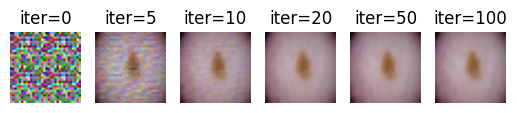

In [26]:

# generate dummy data and label
mse_final=[]
AS=0
sSim_final=[]
whole_duration=0
loss_value=0
count=0
ASR=0
for ii in range(0,len(dst_tensor),10):
    print("Image ID and Image count: ",ii, count+1)
    ######### honest partipant #########
    img_index = ii #use img_index
    dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

    gt_data = tp(dst_pil).to(device)
    gt_data = torch.unsqueeze(gt_data,0)

    gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
    gt_label = gt_label.view(1, )
    gt_onehot_label = label_to_onehot(gt_label, num_classes=2)

    plt.imshow(dst_pil)





    batch =1  #
    for bat in range(batch-1):
        dst_pil = tt(dst_tensor[img_index+1+bat][0].cpu())   #use img_index
        tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
        #print(tmp.shape)
        gt_data = torch.cat((gt_data,tmp),0)

        gt_label_tmp = dst_tensor[img_index+1+bat][1].long().to(device) #use img_index
        gt_label_tmp = gt_label_tmp.view(1, )
        gt_label = torch.cat((gt_label,gt_label_tmp),0)
        gt_onehot_label = torch.cat((gt_onehot_label,label_to_onehot(gt_label_tmp, num_classes=2)),0)

        if gt_label_tmp ==60:
            print (bat)

        plt.imshow(dst_pil)
        #plt.savefig("./original/index_%s_label_%s"%(bat+1,gt_label_tmp.item()))

        #plt.title("Ground truth image")
        #print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())


    gt_label = torch.reshape(gt_label,(-1,1))    
    print (gt_data.shape)
    print (gt_label.shape)
    print (gt_label)
    print (gt_onehot_label.shape)

    plt.imshow(tt(gt_data[0].cpu()),cmap='gray')
    #plt.imshow(invTrans(dst_tensor[66][0].cpu()).permute(1, 2, 0))
    # plt.axis('off')
    # plt.savefig("./attack_image/tifs")


    # compute original gradient 
    dy_dx = []
    original_dy_dx=[]
    original_pred = []
    for item in range(batch):
        gt_data_single = torch.unsqueeze(gt_data[item],0)
        out = net(gt_data_single)
        #y = criterion(out, gt_onehot_label[item])
        y = criterion(out, gt_label[item])
        dy_dx = torch.autograd.grad(y, net.parameters(),retain_graph=True)
        original_dy_dx_tmp = list((_.detach().clone() for _ in dy_dx))
        original_dy_dx.append(original_dy_dx_tmp)
        out_tmp = out.detach().clone()
        original_pred.append(out_tmp)


        #dy_dx.append(torch.autograd.grad(y, net.parameters()))



    # #FOR fully-connected model only
    #     dw = net.body[0].weight
    #     db = net.body[0].bias
    #     dy_dw = torch.autograd.grad(y, dw,retain_graph=True)
    #     dy_db = torch.autograd.grad(y, db,retain_graph=True)

    #     print (dy_dw)
    #     #print (dy_db.shape)

    #     leak=dy_dw/dy_db

    #     print (leak.shape)



    # share the gradients with other clients
    #original_dy_dx = list((_.detach().clone() for _ in dy_dx))

    import time

    from pytorch_msssim import ssim
    from skimage import measure


    #print (ssim(0.43*torch.unsqueeze(gt_data[0],dim=0),torch.unsqueeze(gt_data[0],dim=0),data_range=0).item())
    #print (torch.dist(0.6*torch.unsqueeze(gt_data[0],dim=0),torch.unsqueeze(gt_data[0],dim=0),2).item())


    for item in range(1):
        start = time.process_time()
        for rd in range(1):

            #torch.manual_seed(200*rd)
            #dummy_data = torch.unsqueeze(torch.randn(gt_data[item].size()),0).to(device).requires_grad_(True)

            #dummy_data = torch.unsqueeze(torch.zeros(gt_data[item].size()),0).to(device).requires_grad_(True)
            #dummy_data = torch.unsqueeze(torch.ones(gt_data[item].size()),0).to(device).requires_grad_(True)


            #background = torch.unsqueeze(torch.zeros(gt_data[item].size()),0)
            #background[0,0,::] = 1
            #dummy_data = background.to(device).requires_grad_(True)
            ##dummy_data = (torch.unsqueeze(torch.randn(gt_data[item].size()),0)+background).to(device).requires_grad_(True)

            #surrogate = torch.unsqueeze(gt_data[item+1],0)
            #aaa = torch.rand([3,16,16])
            #surrogate[0,:,8:24,8:24] =aaa
            #dummy_data = surrogate.to(device).requires_grad_(True)    

            #dummy_data = torch.unsqueeze(gt_data[item+1],0).to(device).requires_grad_(True)

            #k = np.random.randint(0,95)
            #dummy_data = torch.unsqueeze(gt_data[k],0).to(device).requires_grad_(True)


            pat_1 = torch.rand([3,16,16])
            pat_2 = torch.cat((pat_1,pat_1),dim=1)
            pat_4 = torch.cat((pat_2,pat_2),dim=2)
            dummy_data = torch.unsqueeze(pat_4,dim=0).to(device).requires_grad_(True)


            #aaa = torch.rand([3,8,8])
            #bbb = torch.cat((aaa,aaa),dim=1)
            #ccc = torch.cat((bbb,bbb),dim=1)
            #ddd = torch.cat((ccc,ccc),dim=2)
            #eee = torch.cat((ddd,ddd),dim=2)
            #dummy_data = torch.unsqueeze(eee,dim=0).to(device).requires_grad_(True)

            #aaa = torch.rand([3,4,4])
            #bbb = torch.cat((aaa,aaa),dim=1)
            #ccc = torch.cat((bbb,bbb),dim=1)
            #ddd = torch.cat((ccc,ccc),dim=1)
            #eee = torch.cat((ddd,ddd),dim=2)
            #fff = torch.cat((eee,eee),dim=2)
            #ggg = torch.cat((fff,fff),dim=2)
            #dummy_data = torch.unsqueeze(ggg,dim=0).to(device).requires_grad_(True)


            #dummy_data = plt.imread("./attack_image/replacement_69.png")
            #print (dummy_data.shape)
            #dummy_data = torch.FloatTensor(dummy_data).to(device)
            #dummy_data = dummy_data.transpose(2,3).transpose(1,2)

            dummy_unsqueeze=torch.unsqueeze(gt_onehot_label[item],dim=0)

            dummy_label = torch.randn(dummy_unsqueeze.size()).to(device).requires_grad_(True)
            label_pred=torch.argmin(torch.sum(original_dy_dx[item][-2], dim=-1), 
                                    dim=-1).detach().reshape((1,)).requires_grad_(False)
            #print (original_dy_dx[item][-1].shape)
            #print (original_dy_dx[item][-1].argmin())

            #print (torch.sum(original_dy_dx[item][-2], dim=-1).argmin())

            plt.imshow(tt(dummy_data[0]))
            #plt.title("Dummy data")
            #plt.savefig("./random_seed/index_%s_rand_seed_%s_label_%s"%(item,rd,torch.argmax(dummy_label, dim=-1).item()))

            #plt.clf()
            print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
            print("stolen label is %d." % label_pred.item())

            start=time.process_time()
            #optimizer = torch.optim.LBFGS([dummy_data,dummy_label])
            optimizer = torch.optim.LBFGS([dummy_data,])
            #optimizer = torch.optim.AdamW([dummy_data,],lr=0.01)
            #optimizer = torch.optim.SGD([dummy_data,],lr=0.01)



            history = []

            percept_dis = np.zeros(300)
            recover_dis = np.zeros(300)
            for iters in range(300):


                percept_dis[iters]=ssim(dummy_data,torch.unsqueeze(gt_data[item],dim=0),data_range=0).item()
                #recover_dis[iters]=torch.dist(dummy_data,torch.unsqueeze(gt_data[item],dim=0),2).item()
                recover_dis[iters]= F.mse_loss(dummy_data,torch.unsqueeze(gt_data[item],dim=0),  reduction='mean').item()

                history.append(tt(dummy_data[0].cpu()))
                def closure():
                    optimizer.zero_grad()

                    pred = net(dummy_data) 

                    #dummy_onehot_label = F.softmax(dummy_label, dim=-1).long()

                    #dummy_loss = criterion(pred, dummy_onehot_label) # TODO: fix the gt_label to dummy_label in both code and slides.
                    ##print (pred)
                    ##print (label_pred)

                    dummy_loss = criterion(pred, label_pred)
                    dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)
                    ##dummy_dy_dp = torch.autograd.grad(dummy_loss, dummy_data, create_graph=True)
                    ##print (dummy_dy_dp[0].shape)  

                    grad_diff = 0
                    grad_count = 0
                    #count =0
                    #print(type(dummy_dy_dx))
                    dummy_dy_dx=list(dummy_dy_dx)
                    #print(type(original_dy_dx[item]))
                    for gx, gy in zip(dummy_dy_dx, original_dy_dx[item]): # TODO: fix the variablas here

                        #if iters==500 or iters== 1200:
                        #print (gx[0])
                        #    print ('hahaha')
                        #print (gy[0])
                        lasso = torch.norm(dummy_data,p=1)
                        ridge = torch.norm(dummy_data,p=2)
                        grad_diff += ((gx - gy) ** 2).sum() #+ 0.0*lasso +0.01*ridge 

                        #print (gx.shape)

                        grad_count += gx.nelement()


                        #if count == 9:
                        #    break
                        #count=count+1
                    # grad_diff = grad_diff / grad_count * 1000

                    #grad_diff += ((original_pred[item]-pred)**2).sum()




                    grad_diff.backward()
                    #print (count)

                    #print (dummy_dy_dx)
                    #print (original_dy_dx)


                    return grad_diff



                optimizer.step(closure)
                if iters % 5 == 0: 
                    current_loss = closure()
                    #if iters == 0: 
                    #print ("%.8f" % current_loss.item())
                    #print(iters, "%.8f" % current_loss.item())
                history.append(tt(dummy_data[0].cpu()))
            end=time.process_time()



            #plt.figure(figsize=(18, 12))
            #for i in range(60):
            #  plt.subplot(6, 10, i + 1)
            #  plt.imshow(history[i * 5])
            #  plt.title("iter=%d" % (i * 5))
            #  plt.axis('off')

            #plt.figure(figsize=(12, 1.5))
            #iter_idx = [0,20,40,60,80,100,120,140,160,180]
            #plt.figure(figsize=(6.5, 1.2))
            #iter_idx = [0,1000,2000,3000,4000,5000]
            iter_idx = [0,5,10,20,50,100]


            for i in range(6):
              plt.subplot(1, 6, i + 1)
              plt.imshow(history[iter_idx[i]])
              plt.title("iter=%d" % (iter_idx[i]))
              plt.axis('off')

            #np.savetxt('ssim_random2',percept_dis,fmt="%4f")
            #np.savetxt('mse_random2',recover_dis,fmt="%4f")

            #print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
            #plt.savefig("./attack_image/index_%s_rand_%s_label_%s"%(item,rd, label_pred.item()))
            #plt.clf()

        duration = end-start
    
        print ("Running time is :", duration )
        print ("Duration = ",duration)
        print("ssim_random2", percept_dis)
        print("mse_random2", recover_dis)
    count=count+1
    sSim_final.append(percept_dis[299])
    mse_final.append(recover_dis[299])
    whole_duration=whole_duration+(duration/10)
    if(percept_dis[299]>=.90):
        AS=AS+1
    



In [27]:
sSim_final

[0.006729867309331894,
 0.0006893629906699061,
 0.003250391222536564,
 0.006477998103946447,
 0.0023033604957163334,
 0.0013653063215315342,
 0.002435560803860426,
 0.01144733838737011,
 0.0030129454098641872,
 -0.0034568565897643566,
 -0.006600347813218832,
 0.004292563535273075,
 -0.0017725488869473338,
 0.0013575720367953181,
 -0.0021228815894573927,
 0.005007924046367407,
 -0.011249309405684471,
 0.002161700278520584,
 0.006487889215350151,
 0.010340899229049683,
 0.0012801997363567352,
 0.00503713171929121,
 -6.0741635934391525e-06,
 0.012285280041396618,
 -0.0020173746161162853,
 0.0031161210499703884,
 0.0034209080040454865,
 -0.0012565373908728361,
 0.0008524877484887838,
 -0.002815311774611473,
 0.003154706209897995,
 0.0032252760138362646,
 -0.005238977260887623,
 -0.001528363092802465,
 -0.003220856189727783,
 0.001790731563232839,
 0.006303770001977682,
 0.0031500812619924545,
 0.00625445693731308,
 -0.0027723698876798153,
 -0.006203924305737019,
 -0.016961704939603806,
 -0

In [28]:
mse_final

[0.13168004155158997,
 0.22312955558300018,
 0.17895039916038513,
 0.14714109897613525,
 0.13468037545681,
 0.13176673650741577,
 0.13512957096099854,
 0.15296685695648193,
 0.11541980504989624,
 0.19782303273677826,
 0.14339885115623474,
 0.17466680705547333,
 0.19338780641555786,
 0.18593654036521912,
 0.12639817595481873,
 0.2283240258693695,
 0.12620909512043,
 0.12274064868688583,
 0.10426339507102966,
 0.11075767874717712,
 0.1165752038359642,
 0.17327581346035004,
 0.21961236000061035,
 0.1202974021434784,
 0.09272410720586777,
 0.11989511549472809,
 0.15765634179115295,
 0.15479609370231628,
 0.2156619429588318,
 0.23536913096904755,
 0.1581052541732788,
 0.17300724983215332,
 0.1453220546245575,
 0.19246958196163177,
 0.11121716350317001,
 0.13958418369293213,
 0.17310582101345062,
 0.11985228955745697,
 0.09883277118206024,
 0.10990318655967712,
 0.17344126105308533,
 0.10993264615535736,
 0.13082891702651978,
 0.1511019766330719,
 0.13847962021827698,
 0.1783878207206726,
 0

In [29]:
print(count)
ASR=AS/count
print("Attack Success Rate: ", ASR)
print("Avg. SSIM: ", np.mean(sSim_final))
print("Avg. MSE: ", np.mean(mse_final))
print("Avg. Duration:", whole_duration/count)

100
Attack Success Rate:  0.5
Avg. SSIM:  0.5005157879790432
Avg. MSE:  0.07590281241988606
Avg. Duration: 1.2777500000000002
